#  Constructing an Hexagon Map for a Sphere

Square maps are great for tabletop games, but what about hexagons?

Hexagons are often used to simulate a space where things are more equally spaced in every direction, but these are not easy to represent in a computer array.  Not easy, but possible.

The second thing about hexagons is that you can use them to map a space onto a sphere, like a football with a mix of hexagons and 12 pentagons.  The football has 20 hexagons and 12 pentagons, but if you use more hexagons, you will always have 12 pentagons like the points on a 20 sided dice (Icosahedron - https://en.wikipedia.org/wiki/Icosahedron)

In [1]:
from copy import copy
%matplotlib inline

##### Import Local Functions

In [2]:
from hex_map import world_map, local_map
from hex_map_navigate import build_the_world
from hex_map_construct import EMPTY, COMMON, POLE, PENTAGON, VIRTUAL, EDGE, VERBOTEN, WRAP

### How do these hexagons map to a sphere
The blue hexagons are mapped to the hexagons on a football.  The green hexagons are in fact pentagons, so the edge attached to a yellow hexagon does not exist in reality,  The purple hexagons are the same location on the sphere, but are also in fact the pentagons on the football.  They are equivalent to the green hexagons.  The aqua hexagons are the "poles" of the sphere and therefore equivalent and also pentagons.  The red hexagons are not accessible.  The yellow hexagons should be mapped to another hexagon in the map.

##### Initalise the World

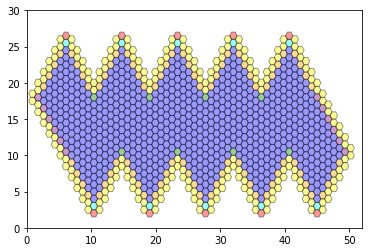

In [3]:
turtle = build_the_world()
world_map(turtle.bitmap)

### Navigating the map
The solution to navigating the map is to create a virtual turtle and head out to find a valid tile to land on and a valid direction to point.  There is also the consideration of tiles that have two or more logical tiles, but only one physical tile.  

In [4]:
from hex_map_navigate import build_the_world, from_wrap

def move(turtle):
    if turtle.state(COMMON):
        print("COMMON")
        turtle = from_common(turtle)
    if turtle.state(POLE):
        print("POLE")
    if turtle.state(PENTAGON):
        print("PENTAGON")
    if turtle.state(EDGE):
        print("EDGE")
    if turtle.state(WRAP):
        print("WRAP")
        turtle = from_wrap(turtle)
    return turtle

##### Testings the movement from the WRAP tile
This has been been done, but can probably be improved with a test harness

##### Testings the movement from the COMMON tile
Moving from COMMON to COMMON is very simple, but all other translations are difficult...

The most difficult translation is COMMON to VIRTUAL as we have to determine what kind of VIRTUAL this might be.

In [5]:
def from_common(turtle):
    """Move the turtle from the COMMON node."""
    newt = copy(turtle)
    newt.move()
    if newt.state(COMMON):
        print("COMMON")
        turtle = copy(newt)
    if newt.state(POLE):
        print("POLE")
        turtle = from_common_to_pole(turtle)
    if newt.state(PENTAGON):
        print("PENTAGON")
        turtle = from_common_to_pentagon(turtle)
    if newt.state(VIRTUAL):
        print("VIRTUAL")
        turtle = from_common_to_virtual(turtle)
    if newt.state(EDGE):
        print("EDGE")
        turtle = from_common_to_edge(turtle)
    if newt.state(WRAP):
        print("WRAP")
        turtle = from_common_to_wrap(turtle)
    return turtle

In [6]:
from hex_map_construct import STEPS

def from_common_to_pole(turtle):
    turtle.move()
    poles = range(turtle.x, turtle.bitmap.shape[0], STEPS * 2)
    if turtle.facing == 0:
        poles = range(turtle.x, 0, STEPS * -2)
    for x in poles:
        if turtle.bitmap[x, turtle.y] == POLE:
            print("Turn Left")
            turtle.left()
            turtle.x = x
    return turtle

def from_common_to_pentagon(turtle):
    turtle.move()
    return turtle

def from_common_to_virtual(turtle):
    turtle.move()
    return turtle

def from_common_to_edge(turtle):
    turtle.move()
    return turtle

def from_common_to_wrap(turtle):
    turtle.move()
    return turtle

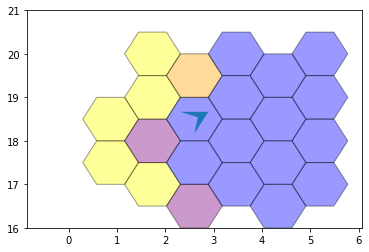

COMMON
COMMON


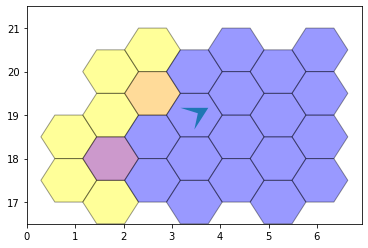

X: 4 - Y: 38 - F: 1


In [7]:
turtle.place(3, 37, 1)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)
print(turtle)

X: 7 - Y: 49 - F: 0


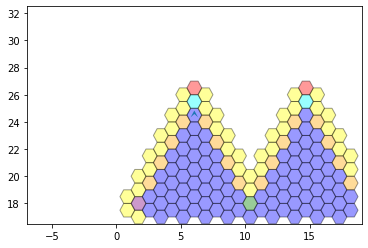

COMMON
POLE
Turn Left
POLE
X: 7 - Y: 51 - F: 5


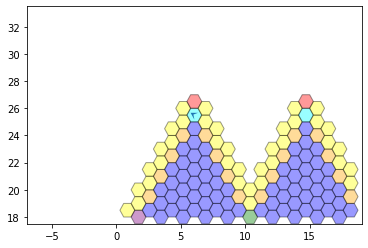

X: 17 - Y: 49 - F: 0


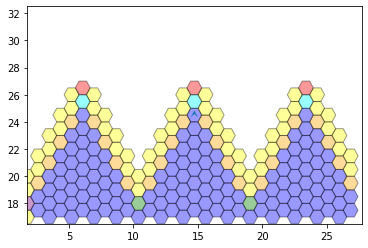

COMMON
POLE
Turn Left
Turn Left
POLE
X: 7 - Y: 51 - F: 4


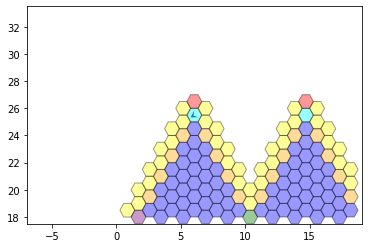

X: 27 - Y: 49 - F: 0


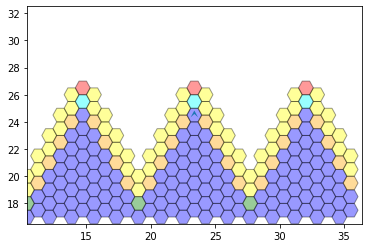

COMMON
POLE
Turn Left
Turn Left
Turn Left
POLE
X: 7 - Y: 51 - F: 3


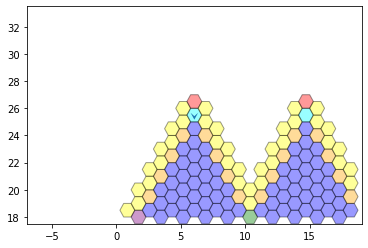

X: 37 - Y: 49 - F: 0


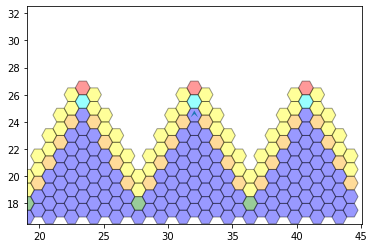

COMMON
POLE
Turn Left
Turn Left
Turn Left
Turn Left
POLE
X: 7 - Y: 51 - F: 2


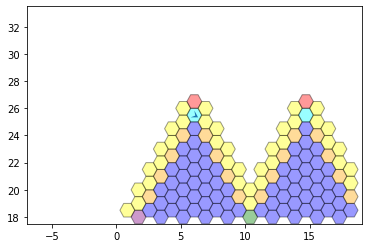

X: 47 - Y: 49 - F: 0


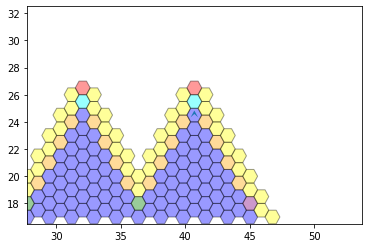

COMMON
POLE
Turn Left
Turn Left
Turn Left
Turn Left
Turn Left
POLE
X: 7 - Y: 51 - F: 1


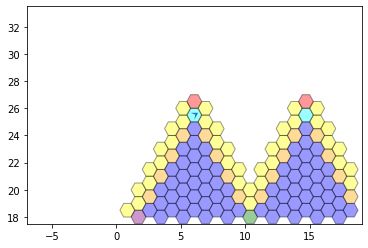

In [8]:
for x in range(7, 7 + STEPS * 2 * 5, STEPS * 2):
    turtle.place(x, 49, 0)
    print(turtle)
    local_map(turtle, 14)
    turtle = move(turtle)
    print(turtle)
    local_map(turtle, 14)

X: 12 - Y: 8 - F: 3


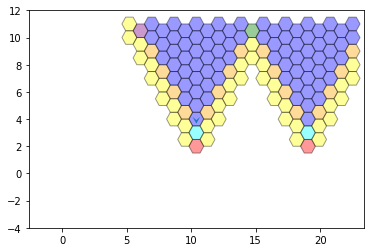

COMMON
POLE
Turn Left
Turn Left
Turn Left
Turn Left
Turn Left
POLE
X: 52 - Y: 6 - F: 4


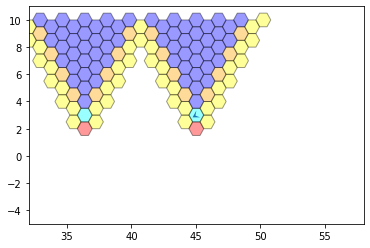

X: 22 - Y: 8 - F: 3


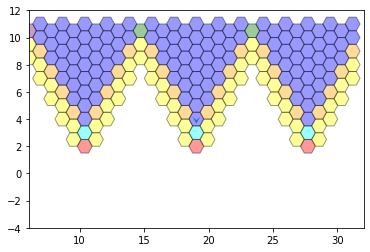

COMMON
POLE
Turn Left
Turn Left
Turn Left
Turn Left
POLE
X: 52 - Y: 6 - F: 5


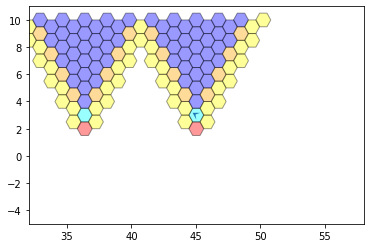

X: 32 - Y: 8 - F: 3


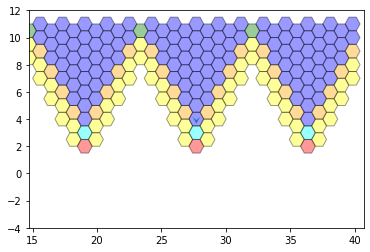

COMMON
POLE
Turn Left
Turn Left
Turn Left
POLE
X: 52 - Y: 6 - F: 0


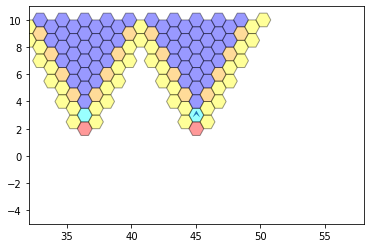

X: 42 - Y: 8 - F: 3


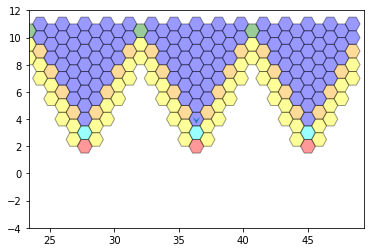

COMMON
POLE
Turn Left
Turn Left
POLE
X: 52 - Y: 6 - F: 1


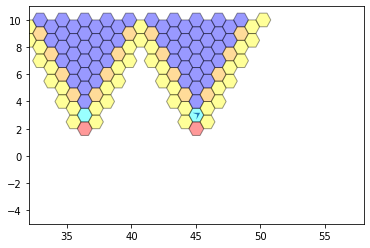

X: 52 - Y: 8 - F: 3


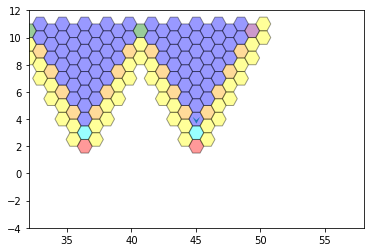

COMMON
POLE
Turn Left
POLE
X: 52 - Y: 6 - F: 2


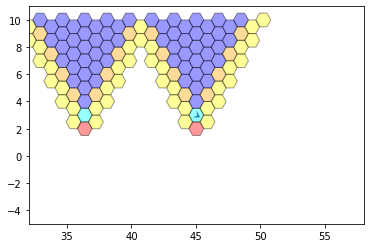

In [9]:
for x in range(12, 12 + STEPS * 2 * 5, STEPS * 2):
    turtle.place(x, 8, 3)
    print(turtle)
    local_map(turtle, 14)
    turtle = move(turtle)
    print(turtle)
    local_map(turtle, 14)

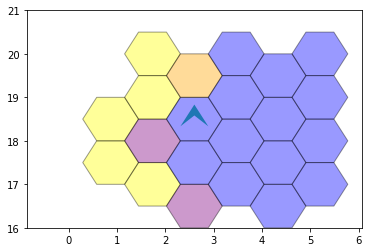

COMMON
EDGE
EDGE


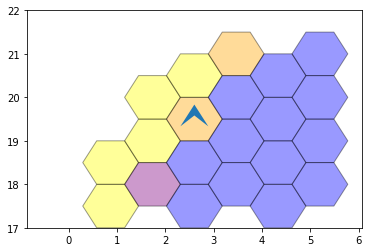

X: 3 - Y: 39 - F: 0


In [18]:
turtle.place(3, 37, 0)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)
print(turtle)

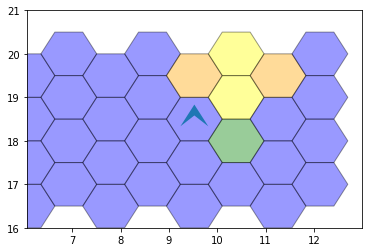

COMMON
EDGE
EDGE


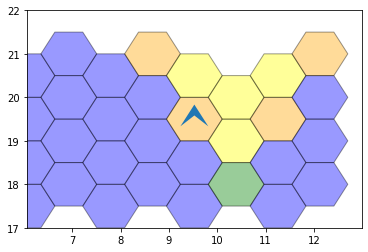

X: 11 - Y: 39 - F: 0


In [19]:
turtle.place(11, 37, 0)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)
print(turtle)

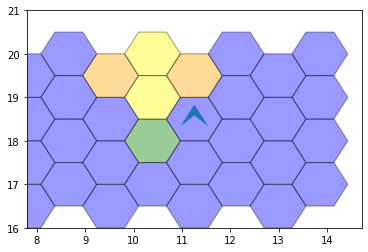

COMMON
EDGE
EDGE


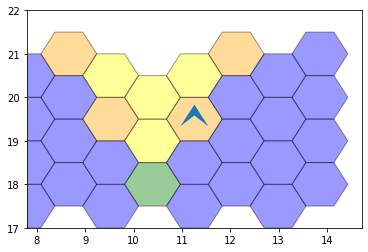

X: 13 - Y: 39 - F: 0


In [20]:
turtle.place(13, 37, 0)
local_map(turtle)
turtle = move(turtle)
local_map(turtle)
print(turtle)